In [1]:
# Reuters newswires into 46 different mutually-exclusive topics.
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2024-05-07 06:31:09.428592: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 06:31:09.428675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 06:31:09.430219: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 06:31:09.441248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 06:31:10.779216: W tensorflow/comp

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [4]:
# To vectorize the labels, there are two possibilities: 
#   we could just cast the label list as an integer tensor, 
#   Use a "one-hot" encoding, it is a widely used format for categorical data, also called "categorical encoding".

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# Can use from keras.utils.np_utils import to_categorical instead of user defined function

In [5]:
# 46 classes - Dimensionality for output space is large then binary classifier.
# 16 Hidden Unit are small for 46 classes. So, 64

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # Output will be probability distribution over 46 classes. Sum=1.

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


2024-05-07 06:43:18.087502: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.6531 - accuracy: 0.4930 - val_loss: 1.8003 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 32ms/step - loss: 1.5228 - accuracy: 0.6819 - val_loss: 1.3642 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.1545 - accuracy: 0.7524 - val_loss: 1.1632 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9316 - accuracy: 0.8032 - val_loss: 1.0675 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.7662 - accuracy: 0.8409 - val_loss: 0.9963 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6340 - accuracy: 0.8668 - val_loss: 0.9530 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5290 - accuracy: 0.8890 - val_loss: 0.8970 - val_accuracy: 0.8160
Epoch 8/20
16

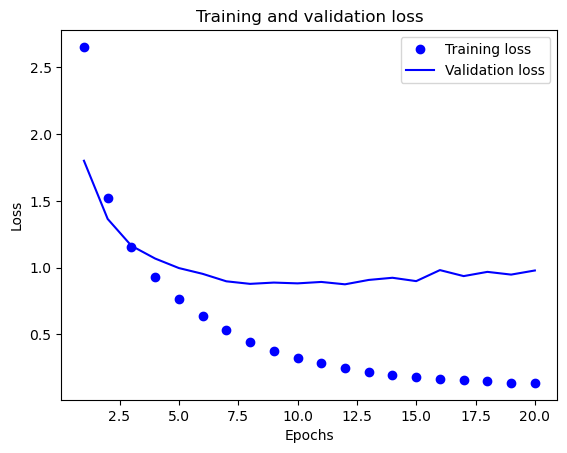

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

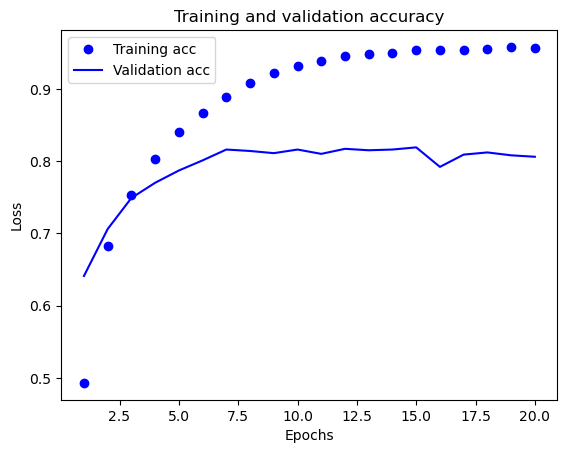

In [12]:
plt.clf() # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# 9 epochs
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results
# 78%

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 0.1292 - accuracy: 0.9594 - val_loss: 0.9735 - val_accuracy: 0.8130
Epoch 2/9
16/16 [==============================] - 0s 25ms/step - loss: 0.1226 - accuracy: 0.9578 - val_loss: 0.9671 - val_accuracy: 0.8110
Epoch 3/9
16/16 [==============================] - 0s 28ms/step - loss: 0.1242 - accuracy: 0.9551 - val_loss: 1.0267 - val_accuracy: 0.8070
Epoch 4/9
16/16 [==============================] - 0s 26ms/step - loss: 0.1189 - accuracy: 0.9574 - val_loss: 1.0076 - val_accuracy: 0.8150
Epoch 5/9
16/16 [==============================] - 1s 32ms/step - loss: 0.1150 - accuracy: 0.9590 - val_loss: 1.0514 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 0s 26ms/step - loss: 0.1163 - accuracy: 0.9570 - val_loss: 1.0798 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 0s 27ms/step - loss: 0.1058 - accuracy: 0.9600 - val_loss: 1.0617 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

[1.1292246580123901, 0.7880676984786987]

In [14]:
# If we choose
"""
y_train = np.array(train_labels)
y_test = np.array(test_labels)
"""

# Then sparse_categorical_crossentropy
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])


# If layer hidden nodes less than 46 then we may drop some information... So, it will perform worst then our.

'\ny_train = np.array(train_labels)\ny_test = np.array(test_labels)\n'